In [10]:
import pandas as pd

In [ ]:
import pymongo
import json
import os
def import_content(filepath,db,collection):
    mng_client = pymongo.MongoClient('localhost', 27017)
    mng_db = mng_client[db] # Replace mongo db name
    collection_name = collection # Replace mongo db collection name
    db_cm = mng_db[collection_name]
    cdir = os.path.dirname(__file__)
    file_res = os.path.join(cdir, filepath)

    data = pd.read_csv(file_res)
    data_json = json.loads(data.to_json(orient='records'))
    db_cm.remove()
    db_cm.insert(data_json)

In [9]:
import requests

resp = requests.get('https://math.uni-pannon.hu/~lipovitsa/szf/zh2022_sz10/bestsellers_with_categories_2022_03_27.json')
txt = resp.json()
df = pd.DataFrame(txt)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.6,5013,17,2009,Non Fiction
1,Arguing with Idiots: How to Stop Small Minds a...,Glenn Beck,4.6,798,5,2009,Non Fiction
2,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,9769,13,2009,Fiction
3,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1542,14,2009,Non Fiction
4,Dead And Gone: A Sookie Stackhouse Novel (Sook...,Charlaine Harris,4.6,1541,4,2009,Fiction
5,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,15,2009,Fiction
6,Divine Soul Mind Body Healing and Transmission...,Zhi Gang Sha,4.6,37,6,2009,Non Fiction
7,"Dog Days (Diary of a Wimpy Kid, Book 4) (Volum...",Jeff Kinney,4.8,3181,12,2009,Fiction
8,Eat This Not That! Supermarket Survival Guide:...,David Zinczenko,4.5,720,1,2009,Non Fiction
9,"Eat This, Not That! Thousands of Simple Food S...",David Zinczenko,4.3,956,14,2009,Non Fiction


In [188]:

print('Csatlakozás az adatbázishoz...')
myclient = pymongo.MongoClient("mongodb://localhost:27017/")

print('Kérem adja meg az adatbázis nevét az alábbiak közül, vagy adjon meg egy új adatbázist')
print(myclient.list_database_names())

dbName = input()
dblist = myclient.list_database_names()
if dbName not in dblist:
    print("Adatbázis létrehozása...")
    
mydb = myclient[dbName]
print('Kérem válasszon egy kollekciót, vagy adjon meg egy újat: ')
print(mydb.list_collection_names())

CollName = input()
CollList = myclient.list_database_names()
if CollName not in CollList:
    print("Kollekció létrehozása...")

Collection = mydb[CollName]

Csatlakozás az adatbázishoz...
Kérem adja meg az adatbázis nevét az alábbiak közül, vagy adjon meg egy új adatbázist
['admin', 'config', 'local', 'szf']
asd
Adatbázis létrehozása...
Kérem válasszon egy kollekciót, vagy adjon meg egy újat: 
[]
k
Kollekció létrehozása...


In [193]:
Collection.insert_many(df.to_dict('records'))

In [195]:
#for x in Collection.find(): print(x)

{'_id': ObjectId('62724ebead63ade3a64fff46'), 'Name': 'Act Like a Lady, Think Like a Man: What Men Really Think About Love, Relationships, Intimacy, and Commitment', 'Author': 'Steve Harvey', 'User Rating': 4.6, 'Reviews': 5013, 'Price': 17, 'Year': 2009, 'Genre': 'Non Fiction'}
{'_id': ObjectId('62724ebead63ade3a64fff47'), 'Name': 'Arguing with Idiots: How to Stop Small Minds and Big Government', 'Author': 'Glenn Beck', 'User Rating': 4.6, 'Reviews': 798, 'Price': 5, 'Year': 2009, 'Genre': 'Non Fiction'}
{'_id': ObjectId('62724ebead63ade3a64fff48'), 'Name': 'Breaking Dawn (The Twilight Saga, Book 4)', 'Author': 'Stephenie Meyer', 'User Rating': 4.6, 'Reviews': 9769, 'Price': 13, 'Year': 2009, 'Genre': 'Fiction'}
{'_id': ObjectId('62724ebead63ade3a64fff49'), 'Name': 'Crazy Love: Overwhelmed by a Relentless God', 'Author': 'Francis Chan', 'User Rating': 4.7, 'Reviews': 1542, 'Price': 14, 'Year': 2009, 'Genre': 'Non Fiction'}
{'_id': ObjectId('62724ebead63ade3a64fff4a'), 'Name': 'Dead An

In [196]:
print('Az adathalmaz mérete: ')
print(df.shape)

(700, 7)


In [ ]:
print('Null értékek száma:')
print(df.isnull().sum())

In [17]:
print('Egyedi értékek száma oszloponként')
print(df.nunique())

Name           440
Author         305
User Rating     14
Reviews        462
Price           40
Year            14
Genre            2
dtype: int64


In [202]:
def kereses():
    print('melyik oszlopban szeretnél keresni? Name-1, Author-2,User Rating-3,Reviews-4,Price-5,Year-6,Genre-7')
    keresesOszlopSzam = input()
    keresettoszlopNev = ''
    if   keresesOszlopSzam == '1': keresettoszlopNev = 'Name'
    elif keresesOszlopSzam == '2': keresettoszlopNev = 'Author' 
    elif keresesOszlopSzam == '3': keresettoszlopNev = 'User Rating' 
    elif keresesOszlopSzam == '4': keresettoszlopNev = 'Reviews' 
    elif keresesOszlopSzam == '5': keresettoszlopNev = 'Price'
    elif keresesOszlopSzam == '6': keresettoszlopNev = 'Year' 
    elif keresesOszlopSzam == '7': keresettoszlopNev = 'Genre'
    else: 
        print('hibás érték')
    if keresettoszlopNev != '':  
        print('Keresés a '+keresettoszlopNev+' ben')
        print('Kérem Írja be a keresett értéket: ')
        keresettErtek = input()
        keresesOszlopSzam = int(keresesOszlopSzam)
        if df.dtypes[keresesOszlopSzam-1] == 'O':
            ObjKereses(keresettoszlopNev, keresettErtek)
        elif df.dtypes[keresesOszlopSzam-1] == 'float64':
            FloatKereses(keresettoszlopNev, keresettErtek)
        elif df.dtypes[keresesOszlopSzam-1] == 'int64':
            IntKereses(keresettoszlopNev, keresettErtek)

In [203]:
def ObjKereses(keresettoszlopNev, keresettErtek):
    print(df.loc[df[keresettoszlopNev].str.contains(keresettErtek, case=False,na=False)].head(10))

def FloatKereses(keresettoszlopNev, keresettErtek):
    print(df.loc[df[keresettoszlopNev]== float(keresettErtek)].head(10))

def IntKereses(keresettoszlopNev, keresettErtek):
    print(df.loc[df[keresettoszlopNev]== int(keresettErtek)].head(10))

In [209]:
kilep = True
while(kilep):
    kereses()
    print('ki szeretne lépni? 1-igen 2-nem')
    ki = input()
    if ki == '1': kilep = False
    elif ki == '2': kilep = True
    else: print('hibás érték')

melyik oszlopban szeretnél keresni? Name-1, Author-2,User Rating-3,Reviews-4,Price-5,Year-6,Genre-7
a
hibás érték
ki szeretne lépni? 1-igen 2-nem


KeyboardInterrupt: Interrupted by user

In [129]:
import matplotlib.pyplot as plt

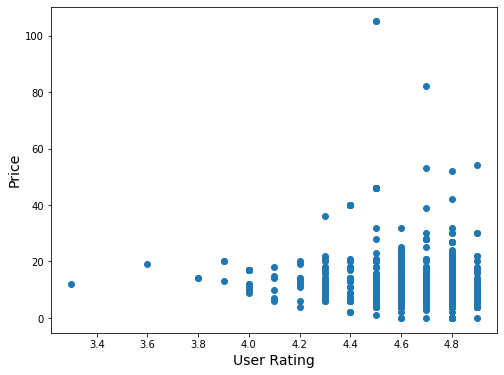

In [160]:
plt.figure(figsize=(8, 6))
plt.scatter(df[['User Rating']],df[['Price']])
plt.ylabel("Price", fontsize=14)
plt.xlabel("User Rating", fontsize=14)

plt.savefig("UserRatingVSPrice")

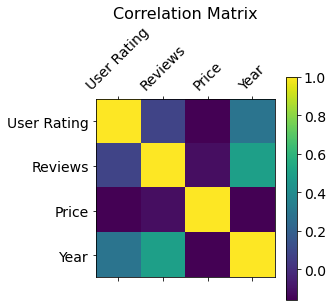

In [169]:
plt.matshow(df.corr())
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.savefig("corrMatrix1")

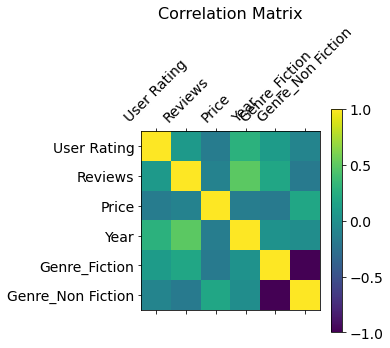

In [170]:
df2 = pd.get_dummies(df, columns=['Genre'])
plt.matshow(df2.corr())
plt.xticks(range(df2.select_dtypes(['number']).shape[1]), df2.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df2.select_dtypes(['number']).shape[1]), df2.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.savefig("corrMatrix2")

In [33]:
#jupyter nbconvert --to script csvconvert.ipynb

In [34]:
#pyinstaller csvconvert.py